# Appendix: Statistics (Part 3)

## Correlation & Regression

### Getting and Preparing the Data (Part 1) 

In [29]:
# RELATIONSHIP BETWEEN BUDGET AND REVENUE
import pandas as pd

In [30]:
movie = pd.read_csv("movies_metadata.csv", low_memory= False) # In case of mixed type warnings, set low_memory=True

In [31]:
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45461,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,439050,tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,...,NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0
45462,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,111109,tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,...,2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [32]:
movie.info() # A BUNCH OF MISSING VALUES!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [33]:
pd.to_datetime(movie.release_date, errors = "coerce") # Non-dates will be "NaT"

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45466, dtype: datetime64[ns]

In [34]:
# Set release_date as index
movie = movie.set_index(pd.to_datetime(movie.release_date, errors = "coerce")).drop(columns = ["release_date"])

In [35]:
movie.sort_index(inplace = True)

In [36]:
movie

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,production_countries,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
release_date,,,,,,,,,,,,,,,,,,,,,
1874-12-09,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,315946,tt3155794,xx,Passage de Venus,Photo sequence of the rare transit of Venus ov...,...,"[{'iso_3166_1': 'FR', 'name': 'France'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Passage of Venus,False,6.0,19.0
1878-06-14,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,194079,tt2221420,en,Sallie Gardner at a Gallop,Sallie Gardner at a Gallop was one of the earl...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Sallie Gardner at a Gallop,False,6.2,25.0
1883-11-19,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,426903,tt5459794,en,Buffalo Running,Individual photographs of the running of a buf...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Buffalo Running,False,5.4,7.0
1887-08-18,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,159897,tt2075247,xx,Man Walking Around a Corner,The last remaining production of Le Prince's L...,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Man Walking Around a Corner,False,4.1,17.0
1888-01-01,False,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,96882,tt1758563,xx,Accordion Player,The last remaining film of Le Prince's LPCCP T...,...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",0.0,1.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",Released,NaN,Accordion Player,False,4.4,18.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaT,False,NaN,0,[],NaN,438910,tt0810384,ru,Konstruktor krasnogo tsveta -1993,Engineering Red - 1993 Dir: Andrey I. Y. Petr...,...,[],0.0,76.0,[],Released,NaN,Engineering Red,False,6.0,2.0
NaT,False,NaN,0,"[{'id': 9648, 'name': 'Mystery'}, {'id': 878, ...",NaN,433711,tt3158690,en,All Superheroes Must Die 2: The Last Superhero,"In a no holds barred documentary, acclaimed jo...",...,[],0.0,74.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,All Superheroes Must Die 2: The Last Superhero,False,4.0,1.0
NaT,False,NaN,0,[],NaN,335251,tt1883368,en,The Land Where the Blues Began,An exploration of the musical and social origi...,...,[],0.0,0.0,[],Released,NaN,The Land Where the Blues Began,False,0.0,0.0


In [37]:
# A cleaner dataframe with just the relevant data
df = movie.loc[:, ["title", "budget", "revenue"]].copy()

In [38]:
df

,title,budget,revenue
release_date,,,
1874-12-09,Passage of Venus,0,0.0
1878-06-14,Sallie Gardner at a Gallop,0,0.0
1883-11-19,Buffalo Running,0,0.0
1887-08-18,Man Walking Around a Corner,0,0.0
1888-01-01,Accordion Player,0,0.0
...,...,...,...
NaT,Engineering Red,0,0.0
NaT,All Superheroes Must Die 2: The Last Superhero,0,0.0
NaT,The Land Where the Blues Began,0,0.0


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45466 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45466 non-null  object 
 2   revenue  45460 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.4+ MB


In [40]:
df.budget = pd.to_numeric(df.budget, errors = "coerce")

### Getting and preparing the Data (Part 2) 

In [41]:
df

,title,budget,revenue
release_date,,,
1874-12-09,Passage of Venus,0.0,0.0
1878-06-14,Sallie Gardner at a Gallop,0.0,0.0
1883-11-19,Buffalo Running,0.0,0.0
1887-08-18,Man Walking Around a Corner,0.0,0.0
1888-01-01,Accordion Player,0.0,0.0
...,...,...,...
NaT,Engineering Red,0.0,0.0
NaT,All Superheroes Must Die 2: The Last Superhero,0.0,0.0
NaT,The Land Where the Blues Began,0.0,0.0


In [42]:
df.info() # We lost 3 budgets on the conversion to numeric! They were strings referencing images???

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45466 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45463 non-null  float64
 2   revenue  45460 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [43]:
df.describe()

,budget,revenue
count,4.546300e+04,4.546000e+04
mean,4.224579e+06,1.120935e+07
std,1.742413e+07,6.433225e+07
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,3.800000e+08,2.787965e+09


In [44]:
df.sort_values(by=["budget","revenue"], ascending=False)

,title,budget,revenue
release_date,,,
2011-05-14,Pirates of the Caribbean: On Stranger Tides,380000000.0,1.045714e+09
2007-05-19,Pirates of the Caribbean: At World's End,300000000.0,9.610000e+08
2015-04-22,Avengers: Age of Ultron,280000000.0,1.405404e+09
2006-06-28,Superman Returns,270000000.0,3.910812e+08
2017-06-21,Transformers: The Last Knight,260000000.0,6.049421e+08
...,...,...,...
NaT,NaN,0.0,NaN
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN


In [45]:
df.iloc[:, -2:]  = df.iloc[:, -2:] / 1000000 # Divide budget and revenue by one million

In [46]:
df.sort_values(by=["budget","revenue"], ascending=False)

,title,budget,revenue
release_date,,,
2011-05-14,Pirates of the Caribbean: On Stranger Tides,380.0,1045.713802
2007-05-19,Pirates of the Caribbean: At World's End,300.0,961.000000
2015-04-22,Avengers: Age of Ultron,280.0,1405.403694
2006-06-28,Superman Returns,270.0,391.081192
2017-06-21,Transformers: The Last Knight,260.0,604.942143
...,...,...,...
NaT,NaN,0.0,NaN
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN


In [47]:
df.loc[df.title.isna()] # No movie, no data!

,title,budget,revenue
release_date,,,
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN
NaT,NaN,0.0,NaN
NaT,NaN,NaN,NaN


In [48]:
df.dropna(inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 45460 entries, 1874-12-09 to NaT
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    45460 non-null  object 
 1   budget   45460 non-null  float64
 2   revenue  45460 non-null  float64
dtypes: float64(2), object(1)
memory usage: 1.4+ MB


In [50]:
df.budget.value_counts() # Budget=0???

0.000000     36570
5.000000       286
10.000000      259
20.000000      243
2.000000       242
             ...  
9.364800         1
4.180000         1
36.500000        1
0.011178         1
6.854500         1
Name: budget, Length: 1223, dtype: int64

In [51]:
df.revenue.value_counts() # Revenue=0???

0.000000     38052
12.000000       20
10.000000       19
11.000000       19
2.000000        18
             ...  
11.083449        1
7.644937         1
24.188922        1
29.918745        1
8.801940         1
Name: revenue, Length: 6863, dtype: int64

In [52]:
df = df.loc[(df.revenue > 0) & (df.budget > 0)] # Filter for real budget and revenue values!

In [53]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.100000,11.000000
1915-12-13,The Cheat,0.017311,0.137365
1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.000000
1918-08-01,Mickey,0.250000,8.000000
1921-01-21,The Kid,0.250000,2.500000
...,...,...,...
2017-07-26,Atomic Blonde,30.000000,90.007945
2017-07-28,The Emoji Movie,50.000000,66.913939
2017-08-03,The Dark Tower,60.000000,71.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5381 entries, 1915-02-08 to 2017-08-04
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    5381 non-null   object 
 1   budget   5381 non-null   float64
 2   revenue  5381 non-null   float64
dtypes: float64(2), object(1)
memory usage: 168.2+ KB


In [55]:
df.describe()

,budget,revenue
count,5381.000000,5381.000000
mean,31.094796,90.318123
std,40.162625,166.142264
min,0.000001,0.000001
25%,5.037000,7.011317
50%,17.000000,29.918745
75%,40.000000,99.965753
max,380.000000,2787.965087


In [56]:
df.sort_values("budget", ascending = False)

,title,budget,revenue
release_date,,,
2011-05-14,Pirates of the Caribbean: On Stranger Tides,380.000000,1045.713802
2007-05-19,Pirates of the Caribbean: At World's End,300.000000,961.000000
2015-04-22,Avengers: Age of Ultron,280.000000,1405.403694
2006-06-28,Superman Returns,270.000000,391.081192
2012-03-07,John Carter,260.000000,284.139100
...,...,...,...
1987-11-06,Less Than Zero,0.000001,12.396383
2012-03-30,Aquí Entre Nos,0.000001,2.755584
1936-02-05,Modern Times,0.000001,8.500000


In [57]:
df.sort_values("revenue", ascending = False)

,title,budget,revenue
release_date,,,
2009-12-10,Avatar,237.000000,2787.965087
2015-12-15,Star Wars: The Force Awakens,245.000000,2068.223624
1997-11-18,Titanic,200.000000,1845.034188
2012-04-25,The Avengers,220.000000,1519.557910
2015-06-09,Jurassic World,150.000000,1513.528810
...,...,...,...
2003-08-15,Tere Naam,0.000001,0.000002
1995-09-28,Mute Witness,0.000002,0.000001
1996-10-16,The Wind in the Willows,0.000012,0.000001


In [58]:
df.to_csv("bud_vs_rev.csv")

### How to calculate Covariance and Correlation 

In [59]:
import pandas as pd
import numpy as np

In [60]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [61]:
df

,title,budget,revenue
release_date,,,
1915-02-08,The Birth of a Nation,0.100000,11.000000
1915-12-13,The Cheat,0.017311,0.137365
1916-12-24,"20,000 Leagues Under the Sea",0.200000,8.000000
1918-08-01,Mickey,0.250000,8.000000
1921-01-21,The Kid,0.250000,2.500000
...,...,...,...
2017-07-26,Atomic Blonde,30.000000,90.007945
2017-07-28,The Emoji Movie,50.000000,66.913939
2017-08-03,The Dark Tower,60.000000,71.000000


In [62]:
df = df.loc["2016"]

In [63]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235 entries, 2016-01-01 to 2016-12-25
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   title    235 non-null    object 
 1   budget   235 non-null    float64
 2   revenue  235 non-null    float64
dtypes: float64(2), object(1)
memory usage: 7.3+ KB


In [65]:
df.describe()

,budget,revenue
count,235.000000,235.000000
mean,40.461695,126.074160
std,51.435816,215.314723
min,0.000500,0.000050
25%,8.500000,5.889868
50%,20.000000,32.000000
75%,45.500000,142.200330
max,250.000000,1153.304495


In [66]:
df.mean()

budget      40.461695
revenue    126.074160
dtype: float64

In [67]:
df.var()

budget      2645.643127
revenue    46360.429784
dtype: float64

In [68]:
df.cov() # Positive covariance -> Both variables increase or decrease together.

,budget,revenue
budget,2645.643127,8861.380845
revenue,8861.380845,46360.429784


In [69]:
df.budget.cov(df.revenue)

8861.380845230347

In [70]:
df.corr() # Strong relationship between the two variables -> 80%

,budget,revenue
budget,1.000000,0.800133
revenue,0.800133,1.000000


In [71]:
df.budget.corr(df.revenue)

0.8001327462030167

In [72]:
df.budget.cov(df.revenue) / (df.budget.std() * df.revenue.std())

0.8001327462030167

In [73]:
np.cov(df.budget, df.revenue)

array([[ 2645.64312661,  8861.38084523],
       [ 8861.38084523, 46360.42978363]])

In [74]:
np.corrcoef(df.budget, df.revenue)

array([[1.        , 0.80013275],
       [0.80013275, 1.        ]])

### Correlation and Scatterplots – visual Interpretation

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [77]:
df = df.loc["2016"]

In [78]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


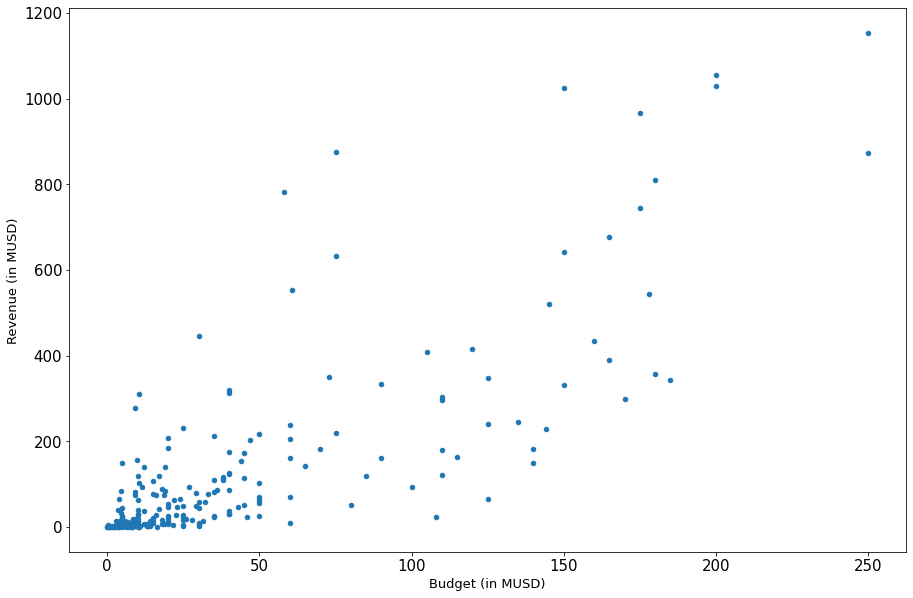

In [79]:
df.plot(kind = "scatter", x = "budget", y = "revenue", figsize = (15, 10), fontsize = 15)
plt.xlabel("Budget (in MUSD)", fontsize = 13)
plt.ylabel("Revenue (in MUSD)", fontsize = 13)
plt.show()

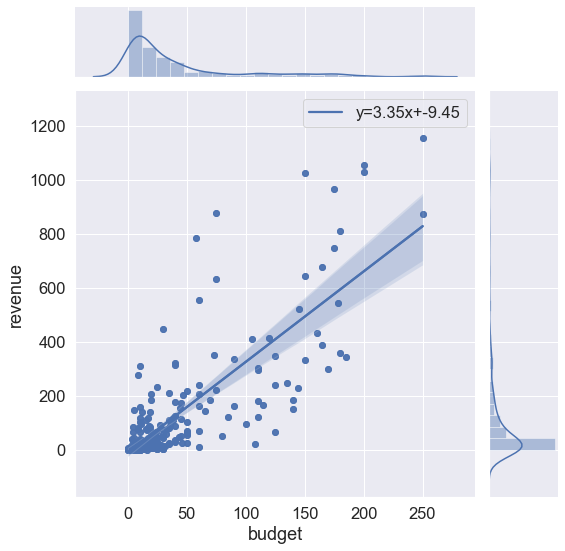

In [102]:
sns.set(font_scale=1.5)
sns.jointplot(data = df, x = "budget", y = "revenue", height = 8, kind='reg')

# Plus Equation
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(df['budget'], df['revenue'])

# use line_kws to set line label for legend
ax = sns.regplot(x="budget", y="revenue", data=df, color='b', 
line_kws={'label':"y={0:.2f}x+{1:.2f}".format(slope,intercept)})

# plot legend
ax.legend()


plt.show() # Roughly an increase of 3.35 million in revenue compared to its budget

### A simple Linear Regression Model with numpy & scipy & seaborn

Create a __simple Linear Regression Model__ with the __independent variable Movie Budget__ and one __dependent variable Movie Revenue__. <br>
Visualize and interpret the __regression coefficients__.

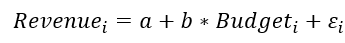

In [82]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(precision=2, suppress= True)

In [83]:
df = pd.read_csv("bud_vs_rev.csv", parse_dates = ["release_date"], index_col = "release_date")

In [84]:
df = df.loc["2016"]

In [85]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


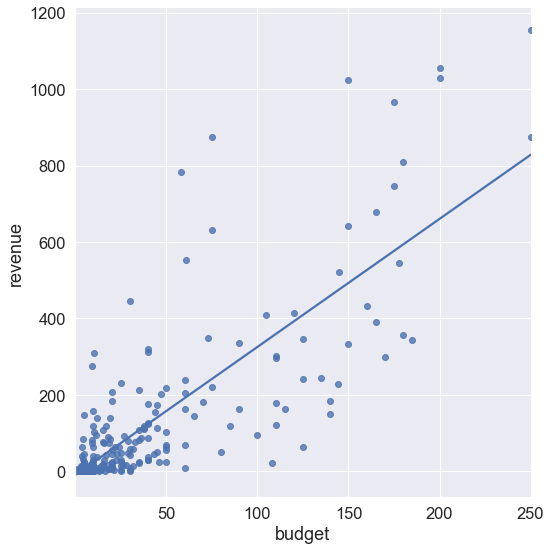

In [86]:
sns.set(font_scale=1.5)
sns.lmplot(data = df, x = "budget", y = "revenue", height = 8, ci = None)
plt.show()

__Linear Regression with numpy__

In [87]:
x = df.iloc[:, -2].values
x

array([ 25.  ,   9.9 ,  10.  ,   5.2 ,  50.  ,  18.  ,  40.  ,  38.  ,
        11.5 ,  38.  ,  10.  ,   4.5 ,   3.5 , 145.  ,  80.  ,   0.3 ,
        20.  ,   0.  ,  13.5 ,   0.3 ,  10.  ,  28.  ,   0.33,  22.  ,
        13.  ,  50.  ,  60.72,  58.  ,   5.  , 150.  ,  14.  ,  18.  ,
        20.  ,  10.72,  20.  ,   3.5 ,   5.  ,  35.  , 140.  ,  23.  ,
         8.  ,  60.  ,   0.  ,   5.21,   6.7 ,  35.  , 110.  ,  15.  ,
        18.5 ,   4.  ,   2.5 ,   2.1 ,  16.  , 250.  ,  18.  ,  10.  ,
         5.  ,   3.2 ,  10.  , 115.  , 175.  ,  29.  ,  20.  ,  31.5 ,
        16.  ,   5.  ,  20.  ,  10.  ,  15.  ,  20.  ,  30.  , 250.  ,
        25.  ,  16.5 ,  35.  ,  10.  ,  29.  ,  30.  ,  73.  ,  27.  ,
        40.  ,   4.  ,  50.  , 178.  ,   2.  ,   9.8 , 160.  , 170.  ,
         3.  , 135.  ,   8.57, 140.  ,  20.  ,  90.  ,   7.  ,   5.07,
         3.5 ,  50.  , 200.  ,   5.98,  75.  , 165.  , 105.  ,   3.  ,
        17.  ,  10.  ,   0.52,  50.  ,  10.  , 180.  ,   5.  ,   5.  ,
      

In [88]:
y = df.iloc[:, -1].values
y

array([   1.4 ,    2.4 ,   40.06,    9.2 ,   69.41,   17.06,  124.83,
        109.91,   94.07,  112.34,   64.19,   32.  ,    0.62,  521.17,
         52.1 ,    2.1 ,   21.16,    0.  ,    3.34,    2.5 ,   18.73,
         16.37,    1.6 ,   63.65,    1.65,   55.97,  553.81,  783.11,
          0.44, 1023.78,    3.62,    6.21,   46.07,    2.98,   12.64,
         40.42,   24.8 ,   25.18,  150.68,   46.15,    0.03,  205.75,
          0.  ,    5.9 ,   12.12,   23.08,  179.25,  108.29,    6.49,
         13.62,    0.23,    0.28,   73.88,  873.26,   88.92,    3.4 ,
         23.51,    4.27,    1.98,  164.6 ,  966.55,   78.64,    8.82,
         14.71,   29.25,    3.22,   55.03,   27.31,   20.57,   14.4 ,
          4.21, 1153.3 ,   48.42,    0.02,  108.76,   15.  ,   48.9 ,
         43.76,  349.78,   93.28,  320.17,   10.9 ,   62.79,  543.93,
          0.34,    2.34,  433.68,  299.37,   14.02,  245.62,    1.98,
        183.35,  207.95,  334.9 ,    1.33,    4.82,    1.49,  216.97,
       1028.57,   14

In [89]:
reg = np.polyfit(x = x, y = y, deg = 1)
reg

array([ 3.35, -9.45])

In [90]:
np.polyfit(x = df.budget, y = df.revenue, deg = 1)

array([ 3.35, -9.45])

In [91]:
X = np.array([min(x), max(x)]) #creating x and y values for regression line

In [92]:
X

array([  0., 250.])

In [93]:
Y = np.polyval(reg, X)

In [94]:
Y

array([ -9.45, 827.91])

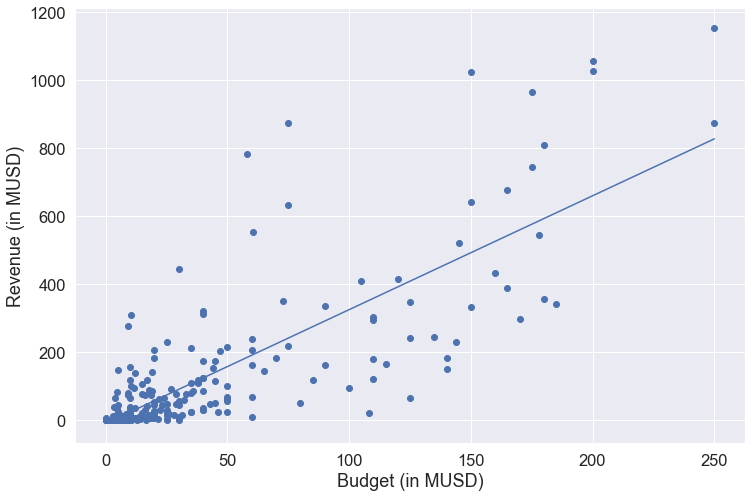

In [95]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y)
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)")
plt.ylabel("Revenue (in MUSD)")
plt.show()

__Linear Regression with scipy__

In [96]:
df

,title,budget,revenue
release_date,,,
2016-01-01,Jane Got a Gun,25.0,1.397284
2016-01-07,Friend Request,9.9,2.400000
2016-01-07,The Forest,10.0,40.055439
2016-01-07,Wazir,5.2,9.200000
2016-01-13,13 Hours: The Secret Soldiers of Benghazi,50.0,69.411370
...,...,...,...
2016-12-23,Resident Evil: The Final Chapter,40.0,312.242626
2016-12-23,Railroad Tigers,50.0,102.205175
2016-12-23,Dangal,10.4,310.000000


In [97]:
stats.linregress(x = df.budget, y = df.revenue)

LinregressResult(slope=3.3494240988498896, intercept=-9.449215053886618, rvalue=0.8001327462030164, pvalue=1.238743107523989e-53, stderr=0.1644951979393437)

### How to interpret Regression Coefficients (Intercept and Slope)

In [98]:
stats.linregress(x = df.budget, y = df.revenue)

LinregressResult(slope=3.3494240988498896, intercept=-9.449215053886618, rvalue=0.8001327462030164, pvalue=1.238743107523989e-53, stderr=0.1644951979393437)

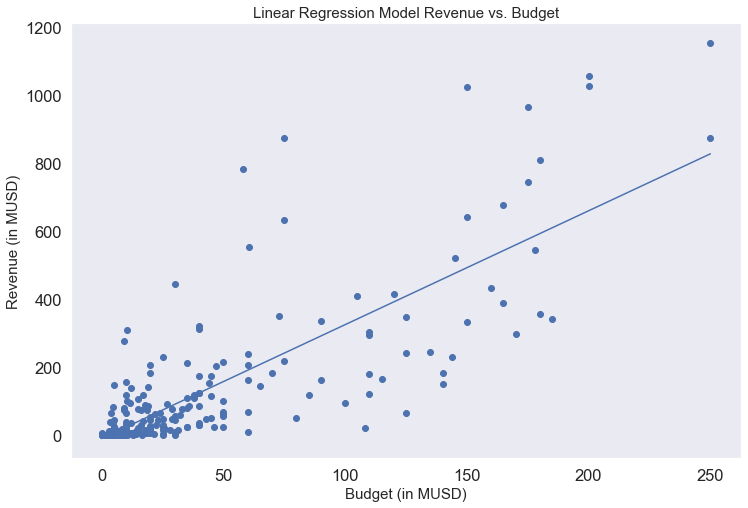

In [99]:
plt.figure(figsize = (12, 8))
plt.plot(X, Y)
plt.grid()
plt.scatter(x = x, y = y)
plt.xlabel("Budget (in MUSD)", fontsize = 15)
plt.ylabel("Revenue (in MUSD)", fontsize = 15)
plt.title("Linear Regression Model Revenue vs. Budget", fontsize = 15)
plt.show()

In [100]:
df.budget.cov(df.revenue) / df.budget.var()

3.3494240988498905

### Case Study (Part 1): The Market Model (Single Factor Model)

In [105]:
import pandas as pd
import yfinance as yf # To install with Anaconda -> conda install -c ranaroussi yfinance
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
df = yf.download(["MSFT", "^SP500TR"], start = "2015-12-31", end = "2018-12-31")

In [ ]:
df

In [ ]:
df = df["Adj Close"]

In [ ]:
df

In [ ]:
ret = df.pct_change().dropna() # Percentage change between current and prior element

In [ ]:
ret

In [ ]:
ret.plot(x = "^SP500TR", y = "MSFT", figsize = (12, 8), kind = "scatter")
plt.grid()
plt.title("MSFT vs. SP500 (daily returns)", fontsize = 15)
plt.show()

In [ ]:
r, p_value = stats.pearsonr(ret["^SP500TR"], ret.MSFT)

In [ ]:
r

In [ ]:
p_value

### Case Study (Part 2): The Market Model (Single Factor Model)

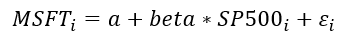

In [ ]:
beta, intercept, rvalue, pvalue, stderr = stats.linregress(x = ret["^SP500TR"], y = ret.MSFT)

In [ ]:
beta

In [ ]:
intercept

In [ ]:
rvalue

In [ ]:
sns.set(font_scale=1.5)
sns.lmplot(data = ret, x = "^SP500TR", y = "MSFT", height = 8, ci = None)
plt.show()